In [0]:
import numpy as np
from numpy.random import RandomState

from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.cross_validation import LeaveOneOut

import matplotlib.pyplot as plt


In [0]:
# Load the dataset
dataset = fetch_olivetti_faces()
data = dataset.images
target= dataset.target


In [0]:
def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    
    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")
    
    plt.show()

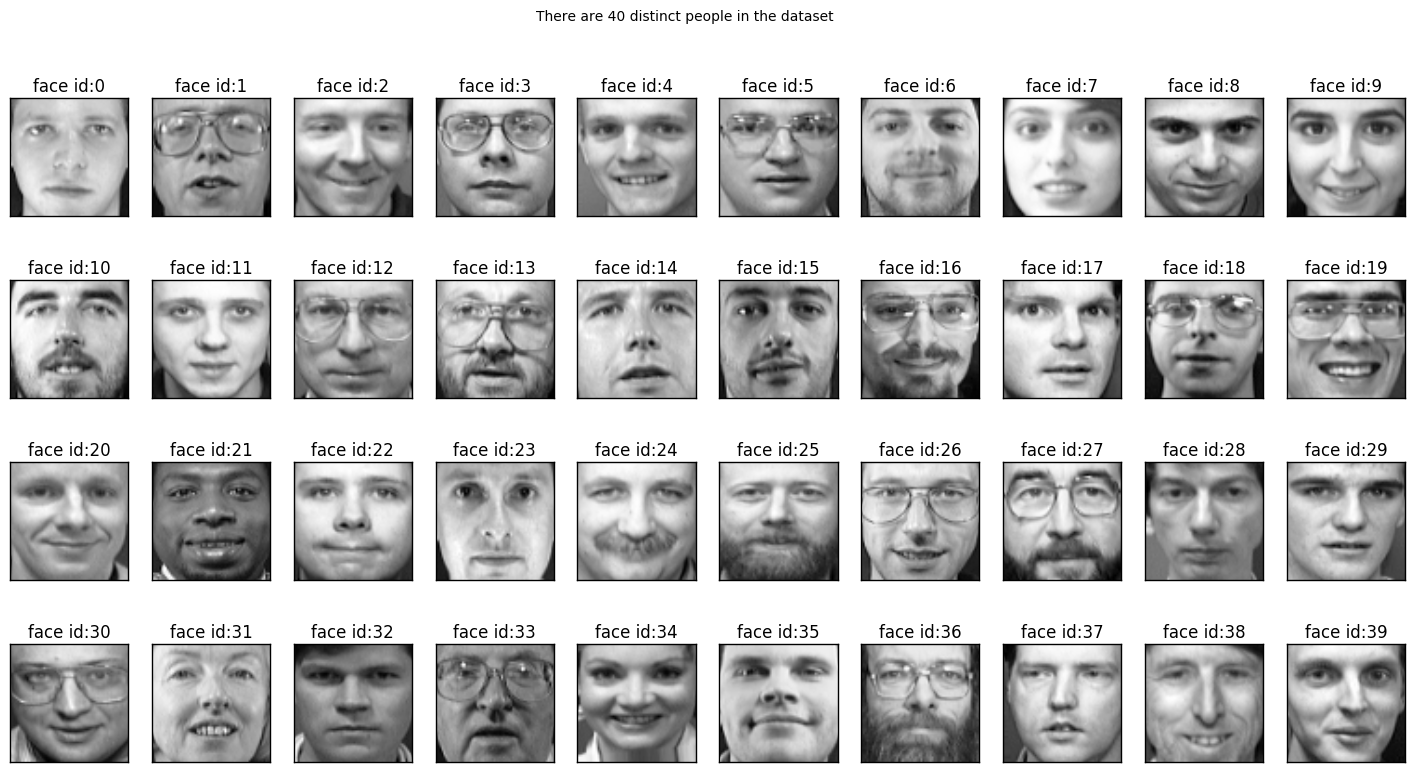

In [0]:
show_40_distinct_people(data, np.unique(target))

In [0]:
def show_10_faces_of_n_subject(images, subject_ids):
    cols=10# each subject has 10 distinct face images
    rows=(len(subject_ids)*10)/cols #
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    #axarr=axarr.flatten()
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))
    plt.show()

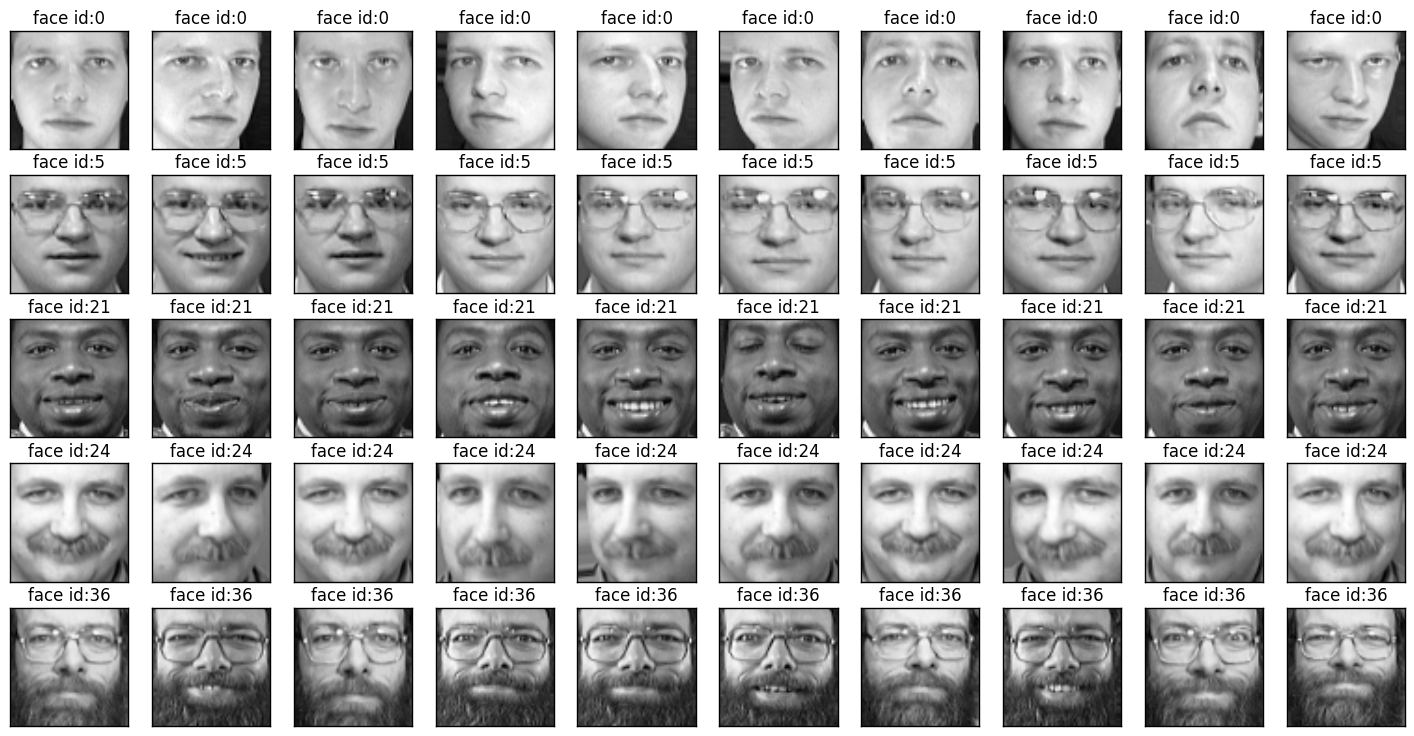

In [0]:
show_10_faces_of_n_subject(images=data, subject_ids=[0,5, 21, 24, 36])

In [0]:
# We reshape the images for the machine learning model
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))

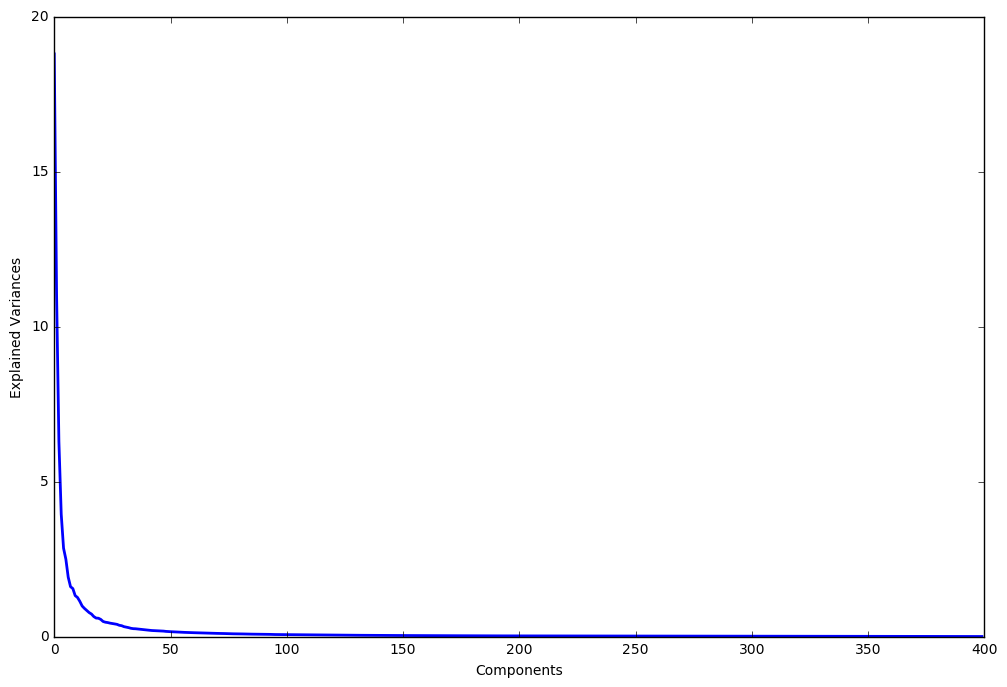

In [0]:
# Determine the optimum number of components to use. 

pca=PCA()
pca.fit(X)

plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variances')
plt.show()

From the above curve, we can see there is clearly no appreciable benefit to using more components than ~100. We will now do this same analysis for FA.

In [0]:
pca=PCA(n_components=90, whiten=True)
tx_x = pca.fit_transform(X)
tx_x.shape

(400L, 90L)

10


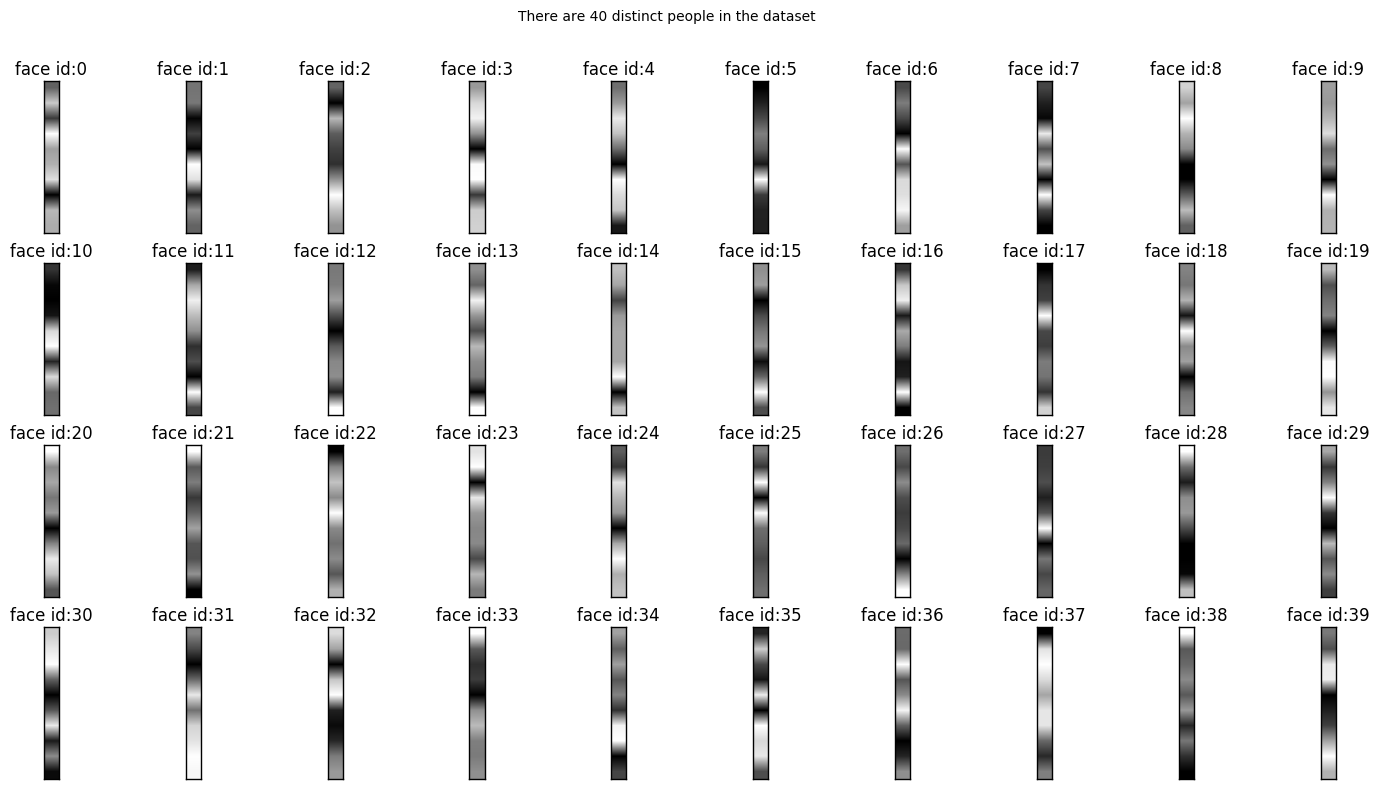

20


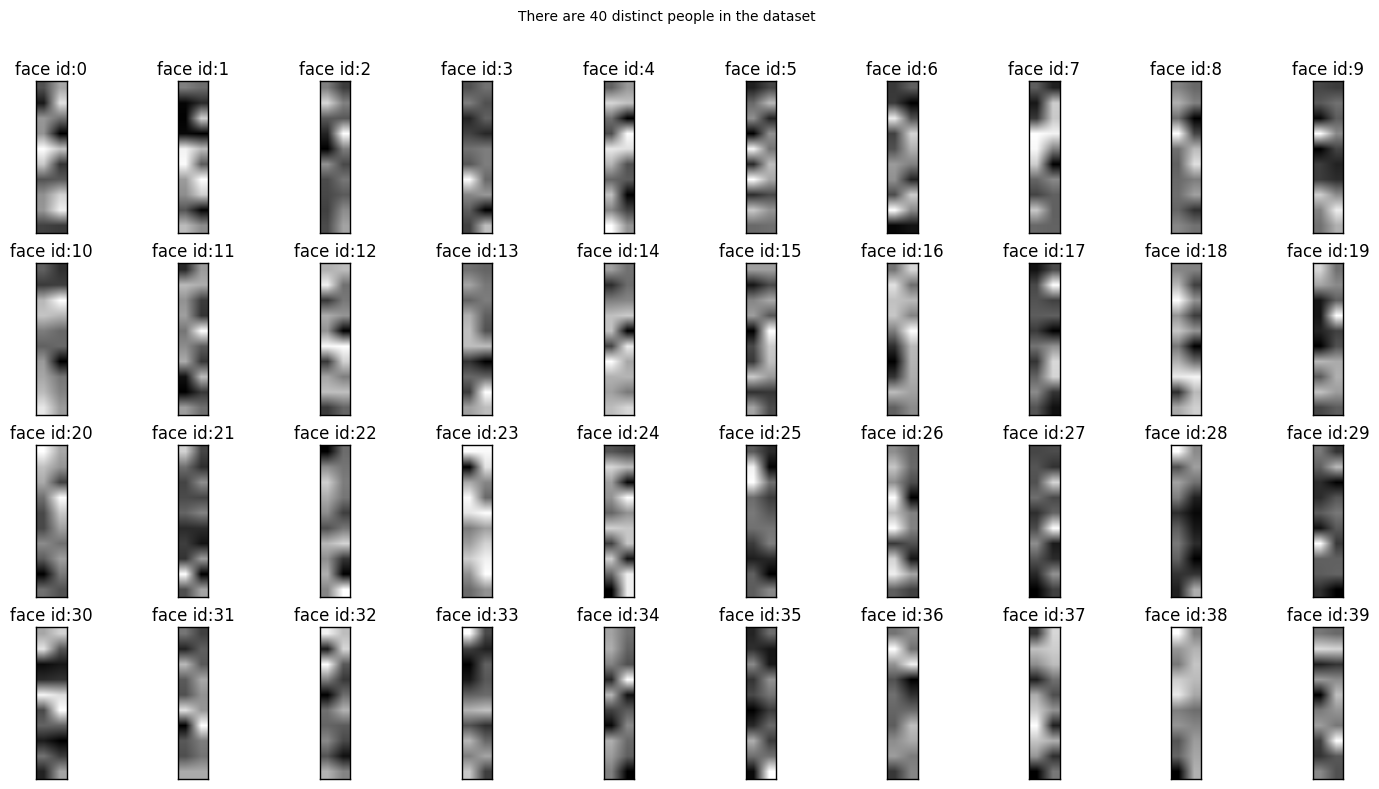

30


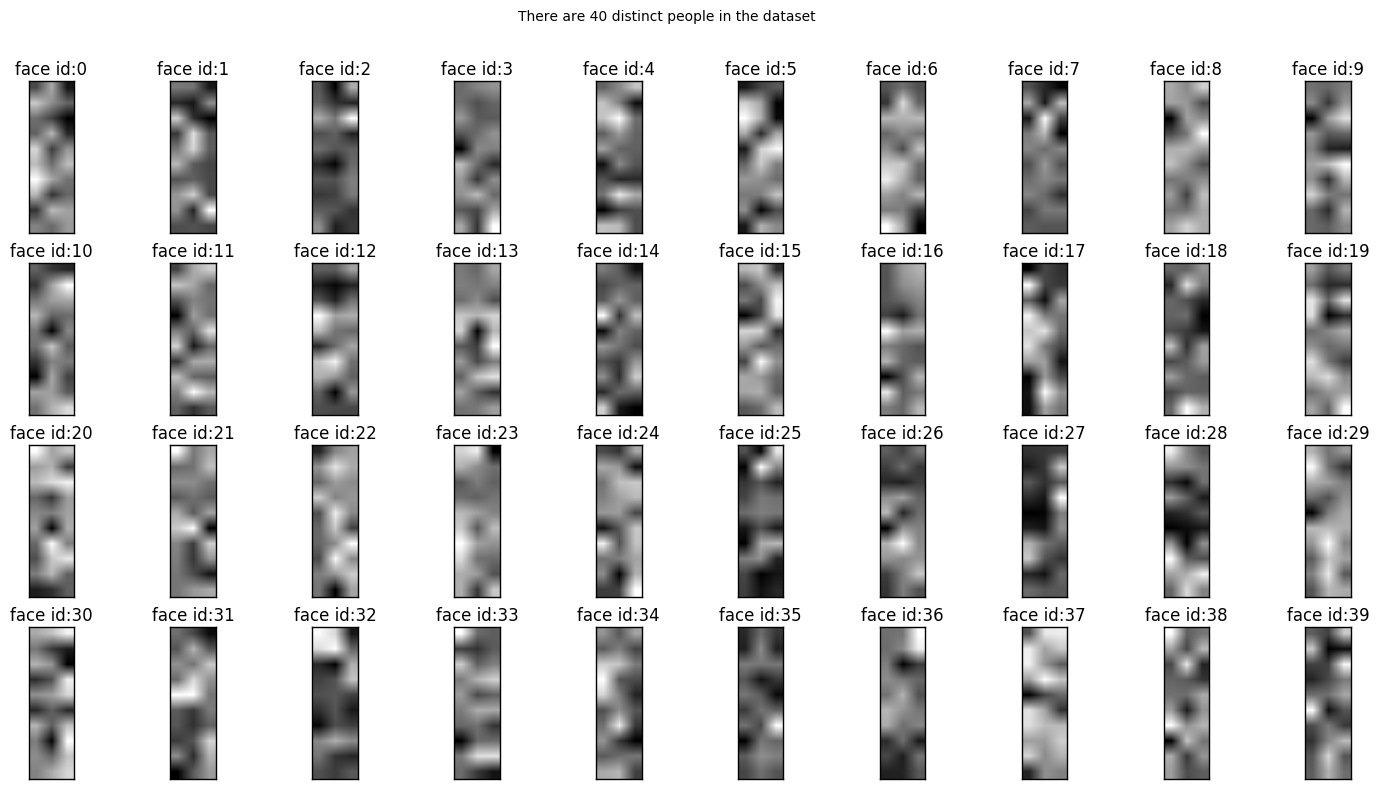

40


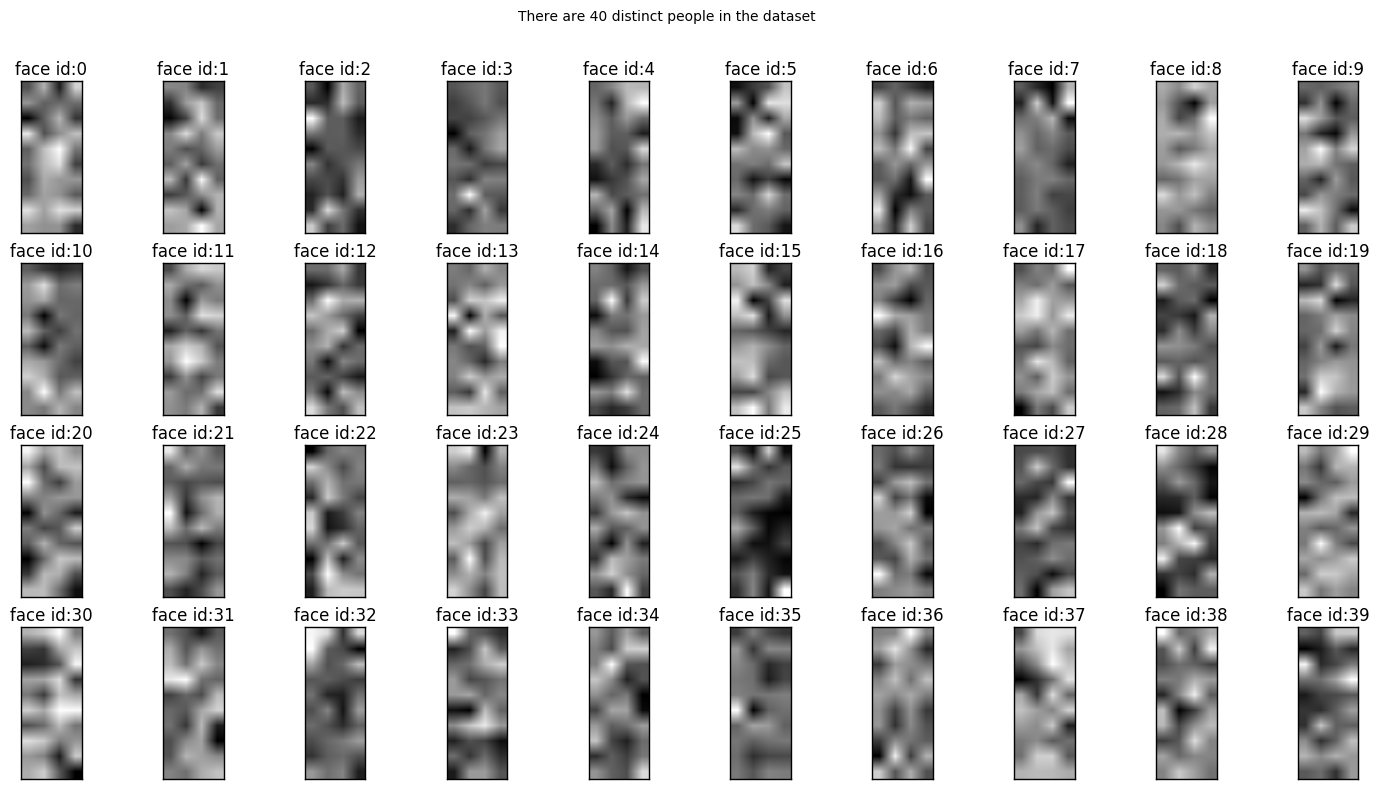

50


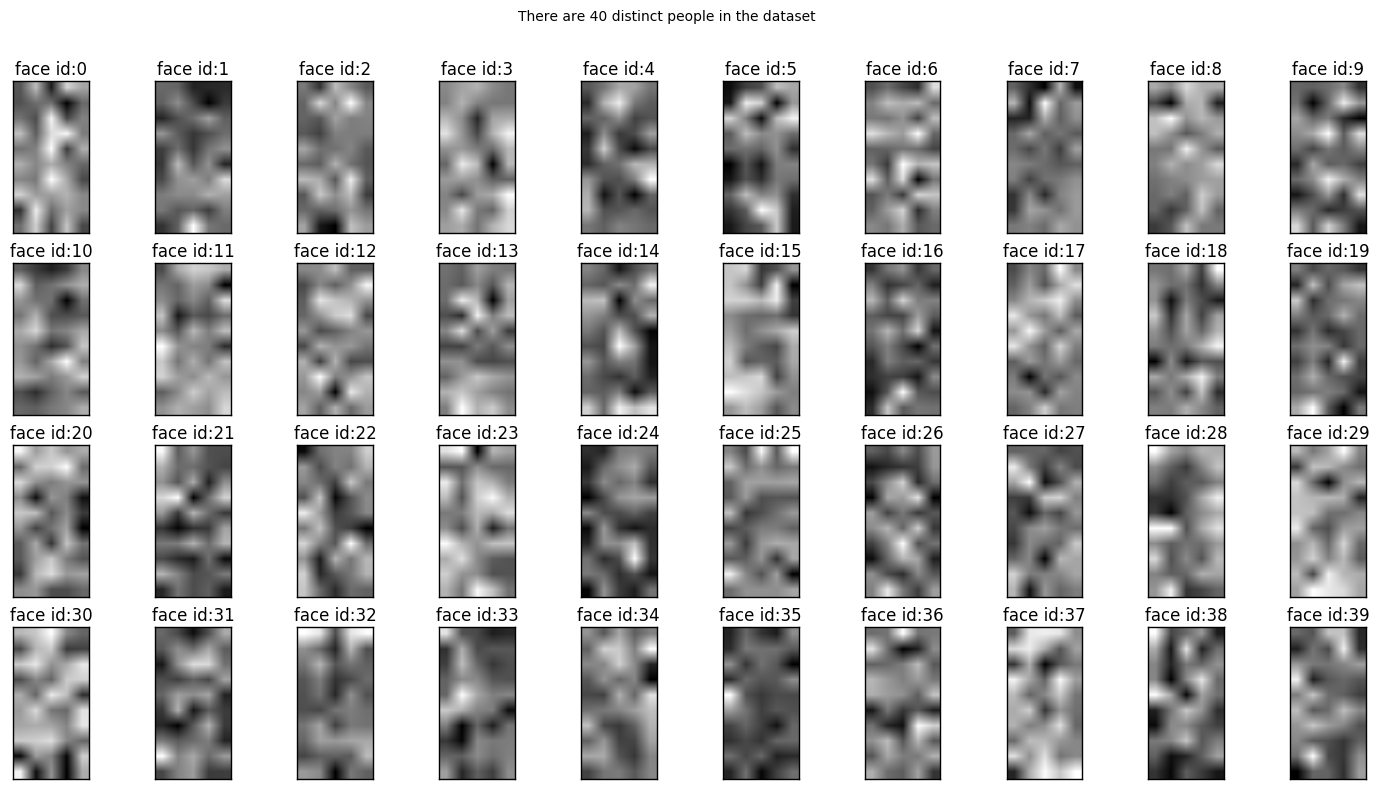

60


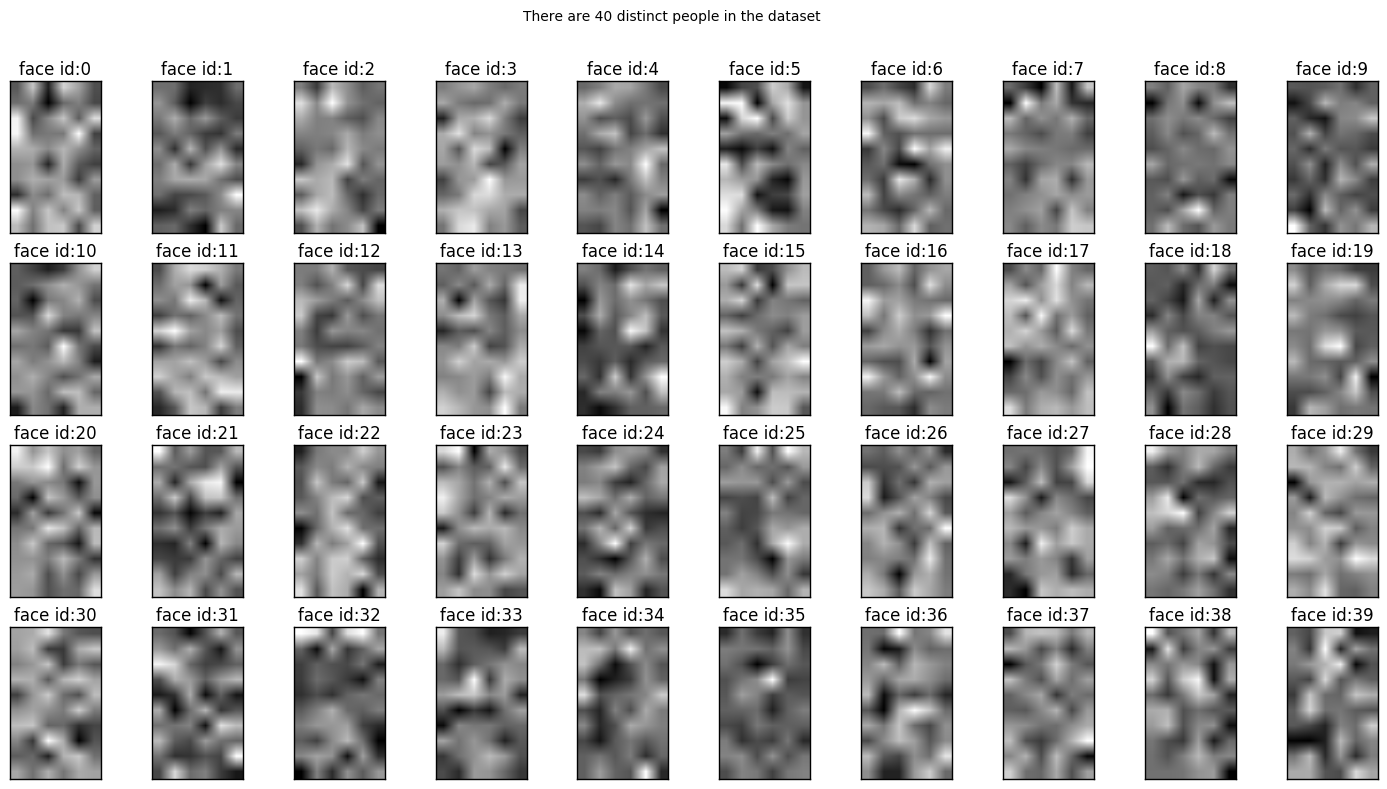

70


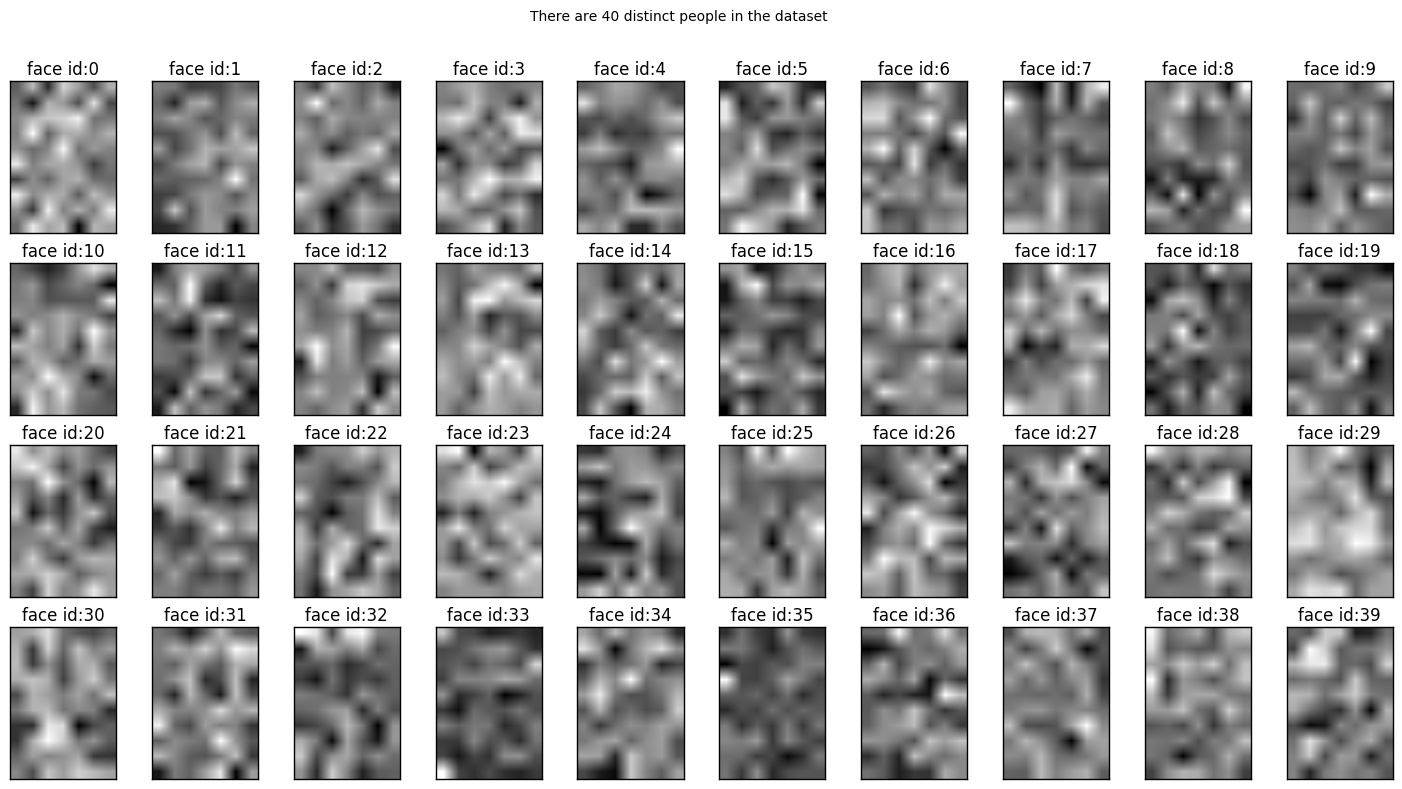

80


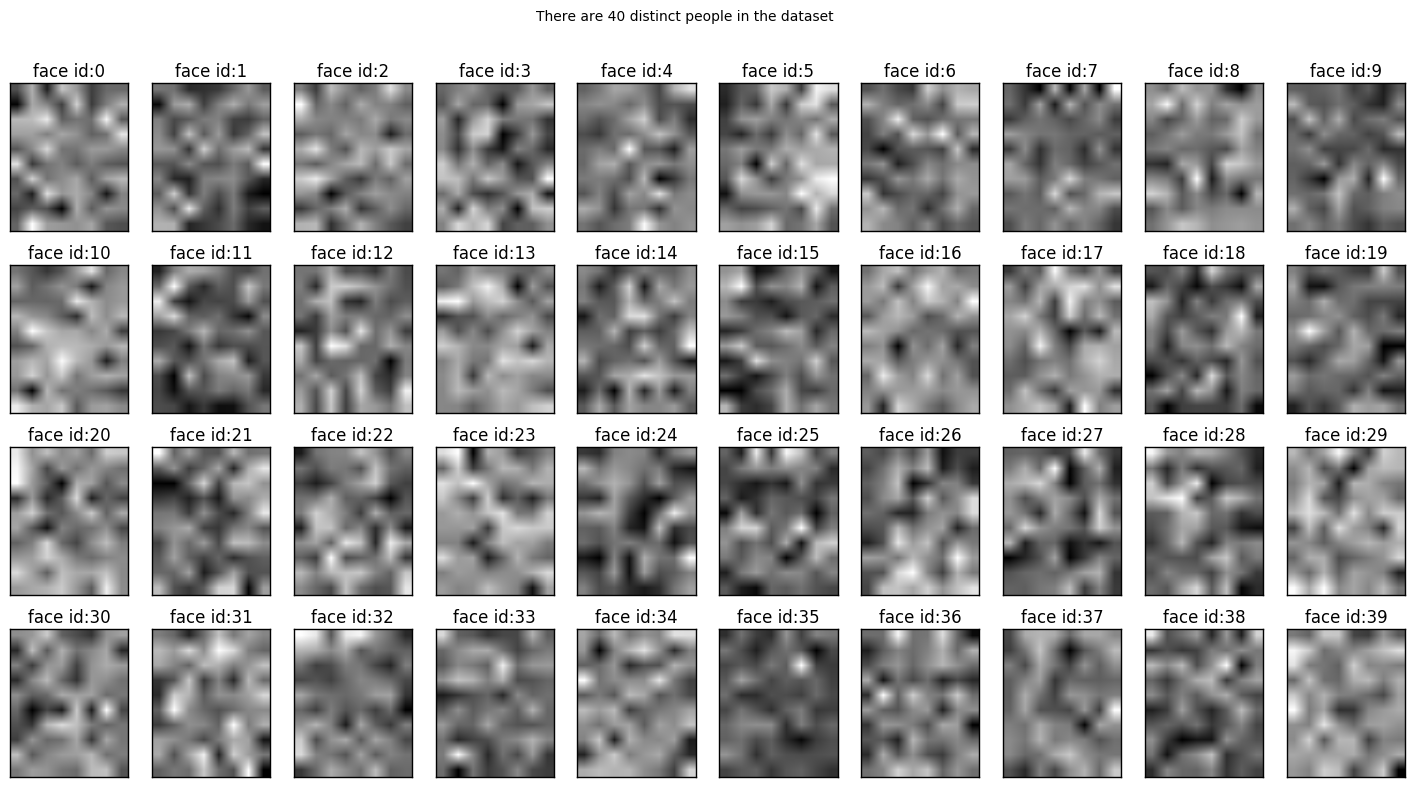

90


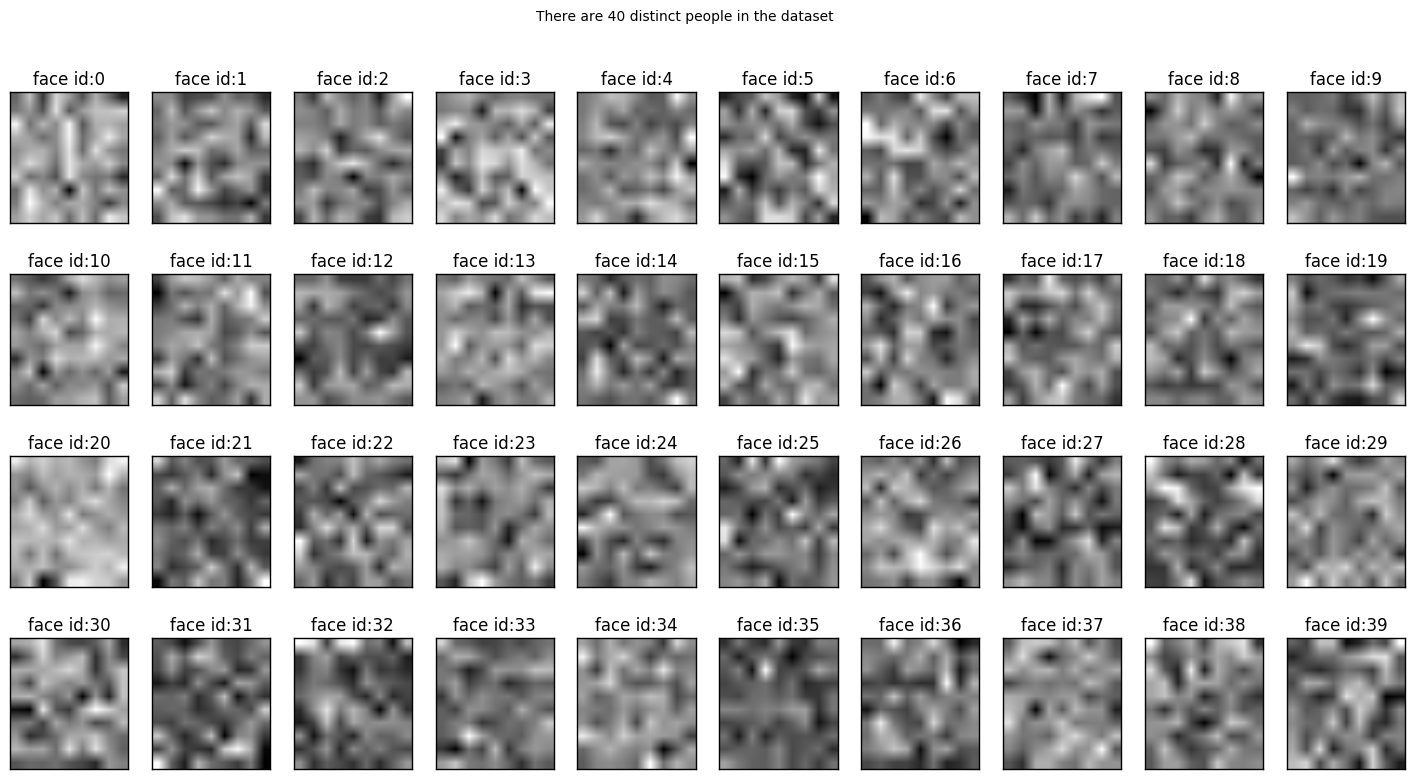

100


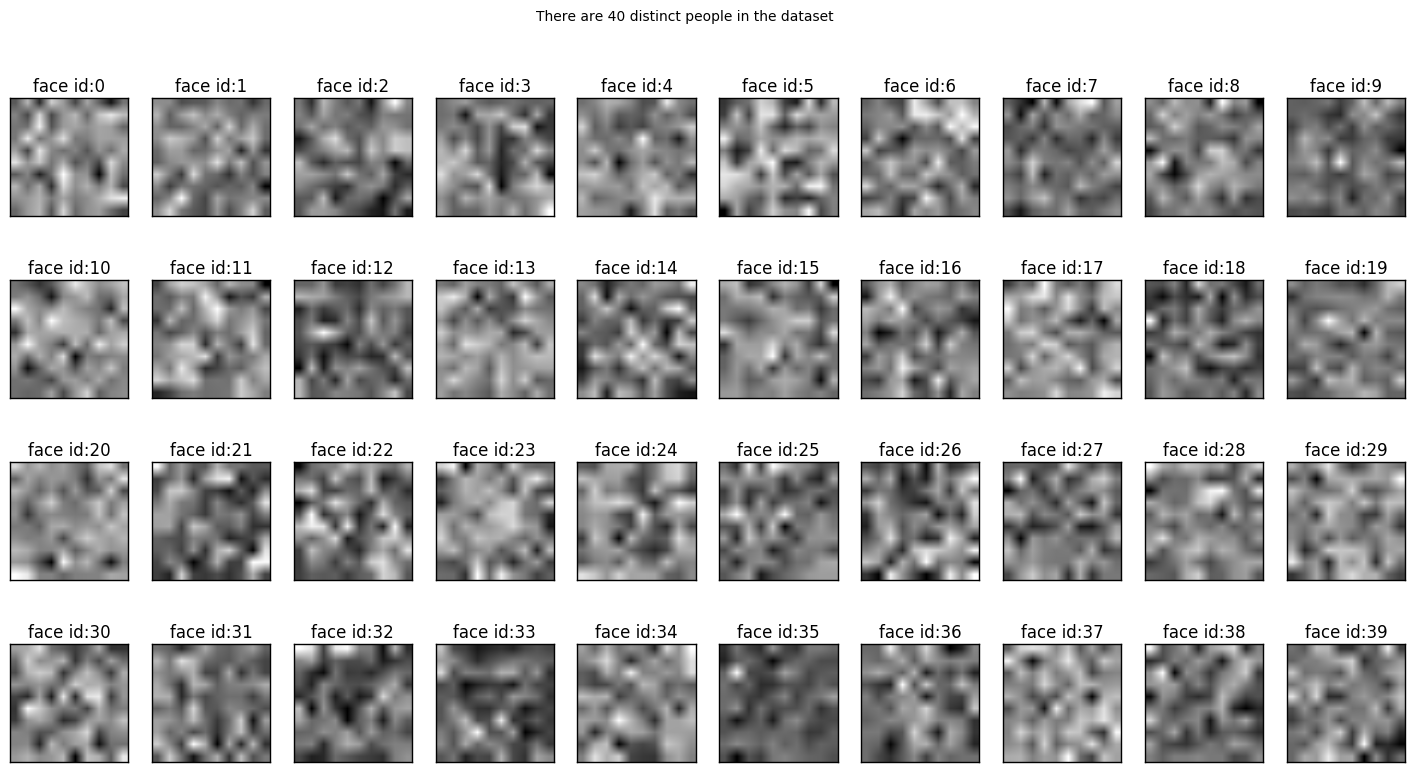

110


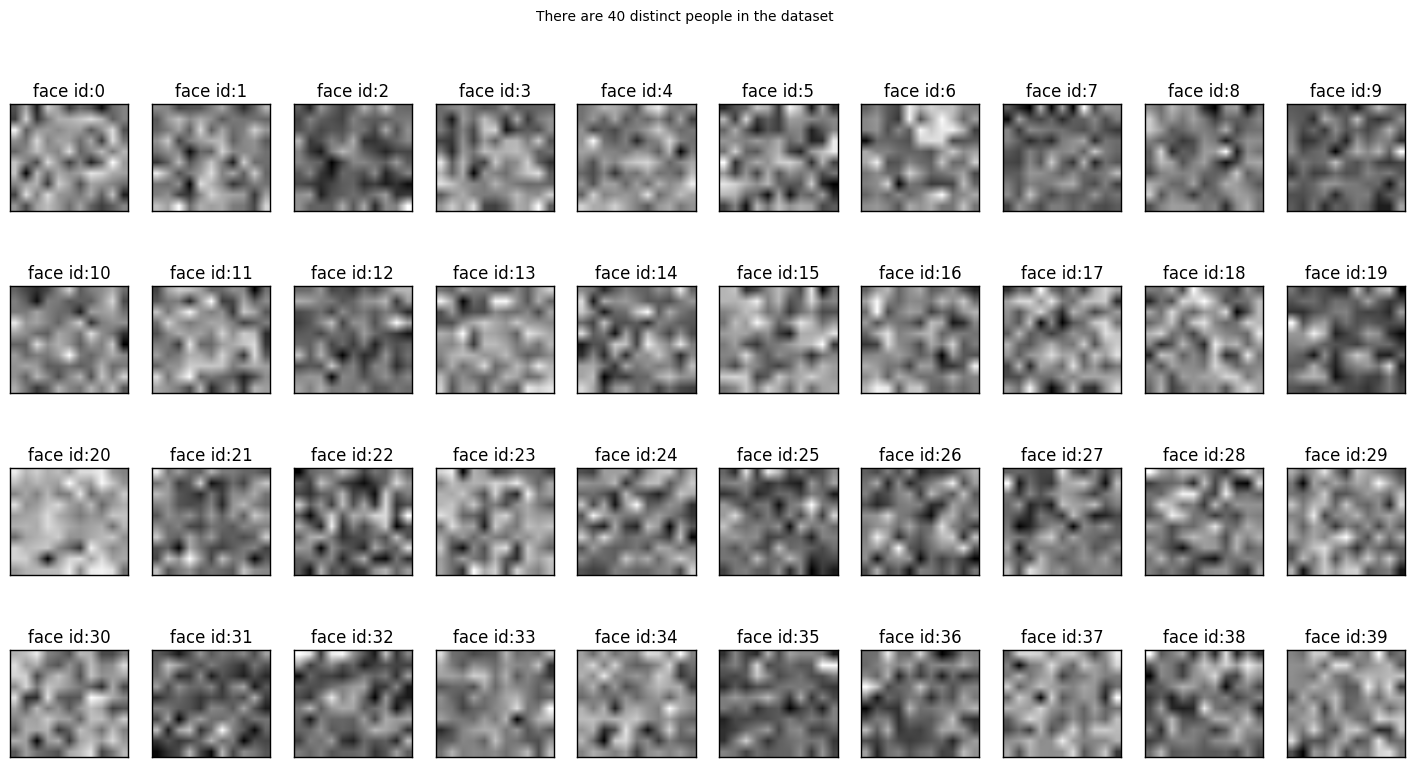

In [0]:
for i in range(10, 120, 10):
    FA = FactorAnalysis(i)
    fa_x = FA.fit_transform(X)
    fa_x = fa_x.reshape(400, 10, i/10)
    print(i)
    show_40_distinct_people(fa_x, target)

In [0]:
import sklearn.metrics as metrics

def bench_k_means(estimator, name, data, labels):
    estimator.fit(data)
    print('%-9s\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean')))

In [0]:
from sklearn.cluster import KMeans

test_data = []
test_labels = []
training_data = []
training_labels = []

for i in range(400):
    if target[i] not in test_labels:
        test_data.append(X[i])
        test_labels.append(target[i])
    else:
        training_data.append(X[i])
        training_labels.append(target[i])

pca = PCA(n_components=90).fit(training_data)

for i in range(5, 45, 5):
    print(i)
    bench_k_means(KMeans(init=pca.components_[:i], n_clusters=i, n_init=1), "PCA", data=np.array(training_data), labels=np.array(training_labels))

5
PCA      	19397	0.286	0.668	0.401	0.086	0.108
10
PCA      	17367	0.393	0.707	0.505	0.128	0.105
15
PCA      	16151	0.466	0.731	0.569	0.165	0.076
20
PCA      	15298	0.514	0.726	0.602	0.191	0.078
25
PCA      	15178	0.535	0.730	0.618	0.212	0.074
30
PCA      	14441	0.550	0.720	0.624	0.220	0.095
35
PCA      	14113	0.581	0.734	0.649	0.241	0.100
40
PCA      	13991	0.576	0.713	0.637	0.231	0.105


In [0]:
kmeans = KMeans(init=pca.components_[:40], n_clusters=40, n_init=1).fit(test_data)
labels = kmeans.predict(test_data)
print(labels)

[ 3 23 34 28 27  4  5  9 35 25 13 12 31 22 19 32 21  1 26 37 29 17 10  2 14
 33 20 24  8 36  6 11 15  7 38  0 39 18 16 30]


**Nearest neighbors**

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(training_data, training_labels) 
y_predict = knn.predict(test_data)

print(y_predict)

from sklearn.metrics import accuracy_score

print(accuracy_score(test_labels, y_predict))

[15  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 29 35 36 39 38  8]
0.9
[ 1  2  3  4  5  6  7  8  8  9 10 11 12 13 14 15 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 29 30 31 32 33 35 36 38 39]
40
